In [20]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pandas_datareader import data as web
import plotly.express as px

In [21]:
tickers = ['NVDA'] #NVDA
# Instantiate data frame container
df = pd.DataFrame()
# For loop to get data from Yahoo finance
for ticker in tickers:
  # Each run of the loop returns a pandas data frame
  df[ticker] = web.DataReader(
    name = ticker, 
    data_source = 'yahoo',
    start = '2022-06-01'
    # Use [ to extract values as pandas series
    )['Adj Close']
# Set column indices






df.columns = tickers
df.tail(20)

,NVDA
Date,
2022-09-23,125.160004
2022-09-26,122.279999
2022-09-27,124.129997
2022-09-28,127.360001
2022-09-29,122.199997
2022-09-30,121.389999
2022-10-03,125.120003
2022-10-04,131.669998
2022-10-05,132.089996


In [22]:
# visualizing historical price movements of NVDA using plotly
fig = px.line(df, x=df.index, y=df['NVDA'], title='NVDA Stock Price')
fig.show()

In [23]:
from statsmodels.tsa.arima.model import ARIMA
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data.values
test_data = test_data.values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast(steps = 12)
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))


Testing Mean Squared Error is 21.185038986556215


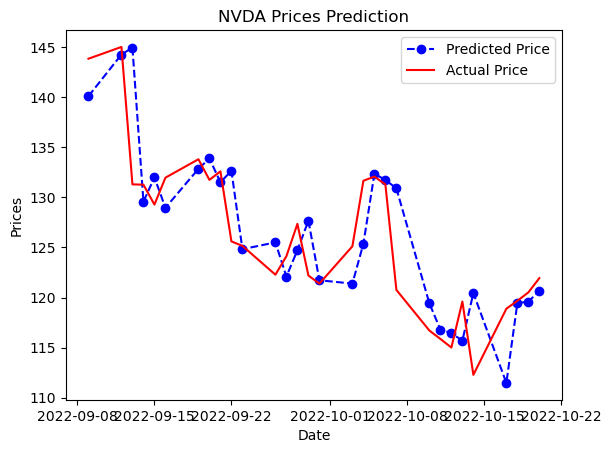

In [24]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('NVDA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')

plt.legend()
plt.show()

In [27]:
# predict the next 12 days
model = ARIMA(df, order=(4,1,0))
model_fit = model.fit()
output = model_fit.forecast(steps=12)
print(output)
output.to_csv('YuenJiaJie_Impl_2.csv')

100    121.582494
101    121.428828
102    121.310314
103    121.232629
104    121.258921
105    121.277949
106    121.289552
107    121.293572
108    121.291081
109    121.289076
110    121.288087
111    121.287928
Name: predicted_mean, dtype: float64
